<a href="https://colab.research.google.com/github/soroush-bn/clustering-mnist-dataset/blob/main/clustring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import sklearn
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sklearn.__version__


'0.22.2.post1'

چون اپلود دیتا های داده شده در گوگل درایو زمان گیر بود و هنگام کار با لینک مستقیم مشکل دانلود داشتیم ، از دیتاهای کراس استفاده میکنیم





In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)


Now we have 60K image with the shape of 28*28 and 60K labels for them .
lets plot some of them to see what they actually are ...

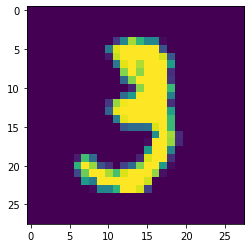

3

In [ ]:
plt.imshow(x_train[10])
plt.show()
y_train[10]

K-means clustering function in scikit learn only accept 1 dimentional array but we have a 28*28 matrix thus we convert this matrix to 1*784 array .

In [ ]:
# convert each image to 1 dimensional array

X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1

X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


**K-Means Clustering** :

we know that mnist dataset has 10 digits so out K numebr is equal to 10 .
for the sake of algorithm time and efficiency we use minibatch k-means.

In [ ]:
from sklearn.cluster import KMeans

n_digits = len(np.unique(y_test))
print("K param is equal to : "+str(n_digits))

# Initialize KMeans model

kmeans = KMeans(n_clusters = n_digits)

# Fit the model to the training data

kmeans.fit(X)

kmeans.labels_

K param is equal to : 10


array([8, 3, 5, ..., 8, 0, 9], dtype=int32)

Now we want to see what are the centroids of the clusters.

100%|██████████| 10/10 [00:00<00:00, 60.72it/s]


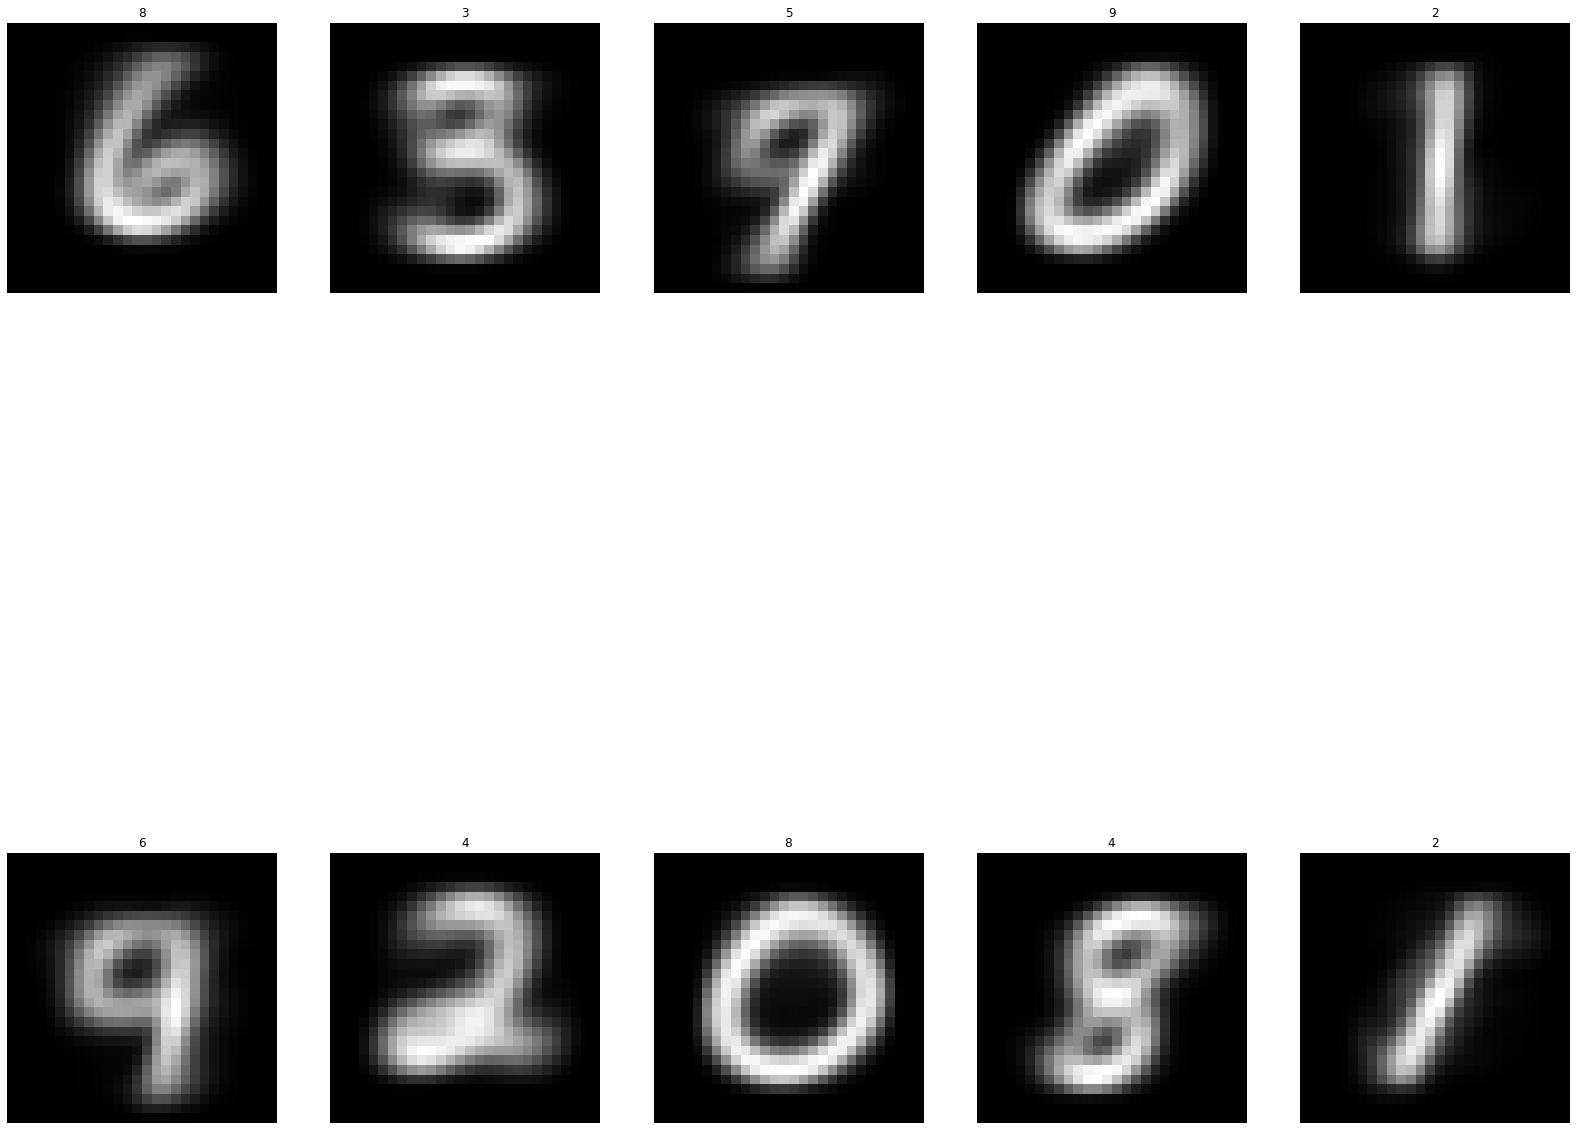

In [ ]:
from tqdm import tqdm
# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(10, 28, 28)

fig = plt.figure(figsize=(28,28))
  
# setting values to rows and column variables
rows = 2
columns = 5
one_count=0
for i in tqdm(range(10)):
    one_count+=1
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, one_count)
  
# showing image
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(kmeans.labels_[i])


K-means clustering is an unsupervised machine learning method; consequently, the labels assigned by our KMeans algorithm refer to the cluster each array was assigned to, not the actual target integer. To fix this, let’s define a few functions that will predict which integer corresponds to each cluster.

In [ ]:
kmeans.n_clusters

10

In [ ]:
def infer_cluster_labels(kmeans, actual_labels):
  inferred_labels = {}

  for i in range(kmeans.n_clusters):

    # find index of points in cluster
    labels = []
    index = np.where(kmeans.labels_ == i)
    #print("index is : " + str(index))
    # append actual labels for each point in cluster
    labels.append(actual_labels[index])
    #print("actual label  is : " + str(actual_labels[index]))
    # determine most common label
    if len(labels[0]) == 1:
        counts = np.bincount(labels[0])
    else:
        counts = np.bincount(np.squeeze(labels))

    # assign the cluster to a value in the inferred_labels dictionary
    if np.argmax(counts) in inferred_labels:
        # append the new number to the existing array at this slot
        inferred_labels[np.argmax(counts)].append(i)
    else:
        # create a new array in this slot
        inferred_labels[np.argmax(counts)] = [i]

    print(labels)
    print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
    
  return inferred_labels



[array([6, 6, 6, ..., 6, 6, 6], dtype=uint8)]
Cluster: 0, label: 6
[array([3, 3, 3, ..., 3, 3, 3], dtype=uint8)]
Cluster: 1, label: 3
[array([9, 4, 7, ..., 7, 9, 9], dtype=uint8)]
Cluster: 2, label: 7
[array([0, 0, 0, ..., 3, 0, 0], dtype=uint8)]
Cluster: 3, label: 0
[array([1, 1, 1, ..., 2, 2, 1], dtype=uint8)]
Cluster: 4, label: 1
[array([4, 4, 4, ..., 9, 7, 4], dtype=uint8)]
Cluster: 5, label: 4
[array([2, 2, 2, ..., 2, 2, 2], dtype=uint8)]
Cluster: 6, label: 2
[array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]
Cluster: 7, label: 0
[array([5, 3, 8, ..., 8, 3, 5], dtype=uint8)]
Cluster: 8, label: 8
[array([1, 5, 1, ..., 5, 1, 8], dtype=uint8)]
Cluster: 9, label: 1
[8 0 4 1 7 2 1 8 1 7]
[5 0 4 1 9 2 1 3 1 4]


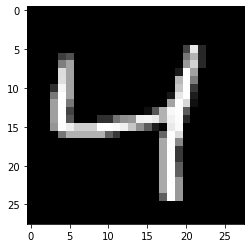

In [ ]:
def infer_data_labels(X_labels, cluster_labels):
  # empty array of len(X)
  predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)

  for i, cluster in enumerate(X_labels):
      for key, value in cluster_labels.items():
          if cluster in value:
              predicted_labels[i] = key
            
  return predicted_labels

# test the infer_cluster_labels() and infer_data_labels() functions

cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
#X_clusters says that each ndarray belong to which cluster but the index is not as same as label of our mnist(digits)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:10])
print (Y[:10])
plt.imshow(X[2].reshape(28,28))
plt.show()

We saw that there isn't any good prediction available so lets measure our clustering evaluation using purity and Rand index. 
but first lets check the inferred labels of centroids.

100%|██████████| 10/10 [00:00<00:00, 68.61it/s]


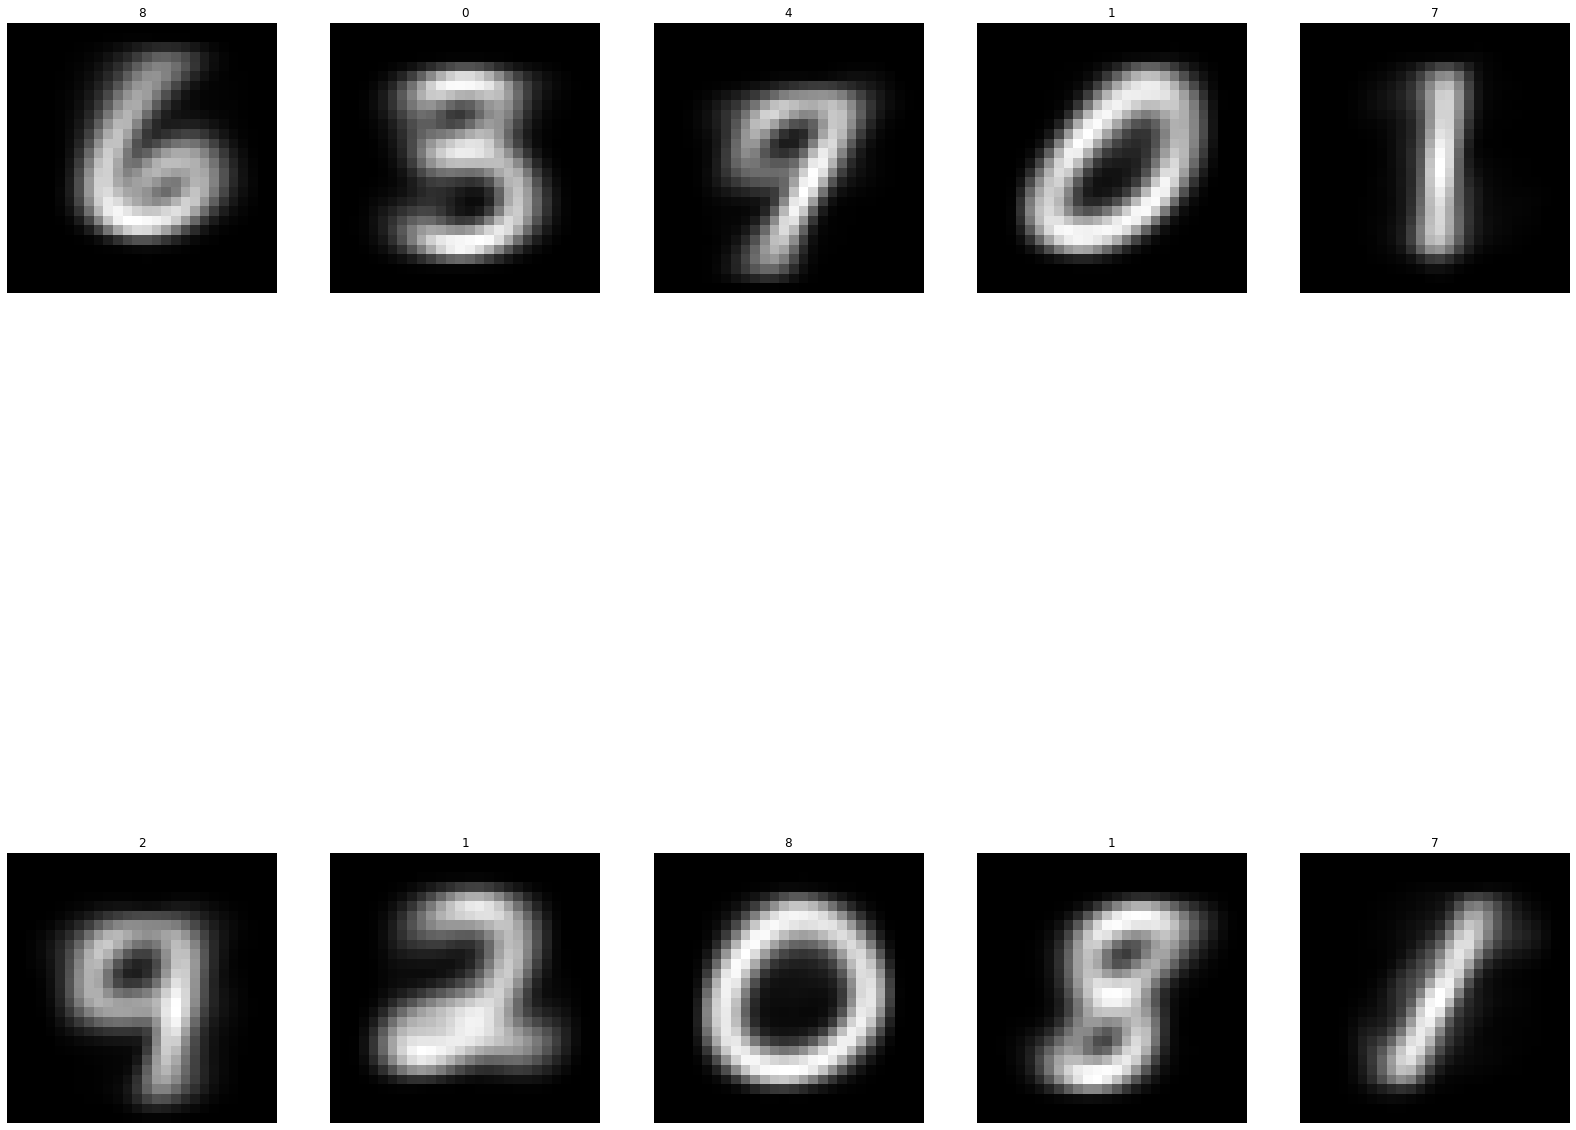

In [ ]:
fig = plt.figure(figsize=(28,28))
  
# setting values to rows and column variables
rows = 2
columns = 5
one_count=0
for i in tqdm(range(10)):
    one_count+=1
    # Adds a subplot at the 1st position
    fig.add_subplot(rows, columns, one_count)
  
# showing image
    plt.imshow(images[i])
    plt.axis('off')
    plt.title(predicted_labels[i])

In [ ]:
kmeans.labels_

array([8, 3, 5, ..., 8, 0, 9], dtype=int32)

*PS : I changed batch-Kmeans to Kmeans for better results*

In [ ]:
# purity measure function
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# rand index measurement function
from sklearn.metrics.cluster import adjusted_rand_score
def rand_index_score(y_true,y_pred):
  return adjusted_rand_score(y_true,y_pred)

In [ ]:
print(" purity score of kmeans algorithm with K parameter of 10")